<h1><a href="www.kaggle.com/devinanzelmo/dota-2-matches">DotA2 Matches dataset</a></h1>

<h2>Описание</h2>
<p>Набор содержит 50000 тысяч матчей ранговых игр. Этот датасет предназначет для оценки поведения игроков, их уровня игры, продолжительности игр, сражений и т.д.</p>
<p>Данные из этого датасета могут использоваться для анализа актуальности выбора определенных героев и предметов, общей модели поведения игроков и девиаций из нее и многого другого. Эти данные полезны, например, при разработке новых обновлений для игры, усовершенствования систем матчмейкинга или наказаний за несоответствующее поведение игроков и прочее.</p>

<div style="padding-left: 2em;">
    <h3>Уточнение для данного задания</h3>
    <p>Для анализа в этом задании выбрана часть датасета с данными по игрокам и героям, на которых они играли конкретный матч. Так как атрибутов получается достаточно много, здесь мы опишем лишь некоторые из них в качестве примера.</p>
</div>

In [1]:
import numpy as np
import pandas as pd

<div style="border: #000000 1px solid; border-radius: 5px; padding: 1em;">
    <h2>Описание выбранных для анализа атрибутов</h2>
    <ul>
        <li>
            <h4>match_id - Номер матча</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Интервальная</td>
                    <td>[0; 499999]</td>
                    <td>24999.5</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>player_slot - Номер места игрока в матче. От 0 до 4 - команда Radiant, от 128 до 132 - команда Dire</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Номинальная</td>
                    <td>[0; 4]∪[128; 132]</td>
                    <td>каждое значение встречается по 50000 раз</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>localized_name - Имя героя, которого выбрал игрок</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Номинальная</td>
                    <td>112 текстовых имен героев, если герой не выбран, то стоит 0</td>
                    <td>Windranger</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>kills - Количество добивание вражеских героев игрока</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[0; 59]</td>
                    <td>7.40</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>deaths - Количество смертей игрока</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[0; 42]</td>
                    <td>7.68</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>assists - Количество содействий игрока</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[0; 54]</td>
                    <td>11.76</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>item_name - Предмет в инвентаре игрока. Предметов всего 6, атрибутов под них всего тоже 6, отличаются номерным суффиксом.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Номинальная</td>
                    <td>189 текстовых наименований предметов</td>
                    <td>enchanted_mango</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>level - Конечный уровень персонажа игрока.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[0; 25]</td>
                    <td>18.05</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>last_hits - Количество добитых игроком вражеских и нейтральных крипов.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[0; 2000]</td>
                    <td>129.48</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>denies - Количество добитых игроком союзных крипов.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[0; 112]</td>
                    <td>5.13</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>hero_damage - Количество урона, нанесенного игроком вражеским героям.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[0; 74932]</td>
                    <td>12234.77</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>hero_healing - Количество лечения игроком союзных героев.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[0; 19222]</td>
                    <td>466.62</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>tower_damage - Количество урона, нанесенного игроком вражеским башням.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[0; 15968]</td>
                    <td>1313.21</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>stuns - Количество секунд контроля, наложенного игроком на врагов.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[-3; 554] (наблюдаются пропуски и выбросы)</td>
                    <td>25.91</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>gold_spent - Количество золота, которое потратил игрок.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[0; 200000] (наблюдаются выбросы)</td>
                    <td>14110</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>gold_per_min - Среднее количество золота в минуту, полученного игроком.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[100; 1601]</td>
                    <td>415.09</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>gold_death - Количество золота, потерянного игроком при смертях.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[-23757; -29] (наблюдаются пропуски)</td>
                    <td>-2688.56</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>gold_buyback - Количество золота, потерянного игроком при выкупе.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[-22602; -5] (наблюдаются пропуски)</td>
                    <td>-1145.88</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>gold_abandon - Количество золота, полученного игроком от союзников, покинувших игру.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[5; 18339] (наблюдаются пропуски)</td>
                    <td>1115.66</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>gold_sell - Количество золота, полученного игроком за продажу предметов.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[15; 197237] (наблюдаются пропуски и выбросы)</td>
                    <td>658.73</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>gold_destroying_structure - Количество золота, полученного игроком за разрушение строений.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[32; 7610] (наблюдаются пропуски)</td>
                    <td>2448.74</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>gold_killing_heros - Количество золота, полученного игроком за вражеских героев.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[18; 37658] (наблюдаются пропуски)</td>
                    <td>4951.47</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>gold_killing_creeps - Количество золота, полученного игроком за добивание крипов.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[18; 112058] (наблюдаются пропуски)</td>
                    <td>5103.97</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>gold_killing_roshan - Количество золота, полученного игроком за Рошана.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[80; 4227] (наблюдаются пропуски)</td>
                    <td>376.67</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>gold_killing_couriers - Количество золота, полученного игроком за курьеров.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[60; 1725] (наблюдаются пропуски)</td>
                    <td>197.01</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>gold_other - Количество золота, полученного игроком из других источников.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[-100; 30986] (наблюдаются пропуски)</td>
                    <td>493.65</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>xp_per_min - Среднее количество опыта в минуту, полученного игроком.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[0; 1559]</td>
                    <td>449.97</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>xp_hero - Количество опыта, полученного игроком за вражеских героев.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[25; 29055] (наблюдаются пропуски)</td>
                    <td>8764.77</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>xp_creep - Количество опыта, полученного игроком за крипов.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[10; 31602] (наблюдаются пропуски)</td>
                    <td>9472.15</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>xp_roshan - Количество опыта, полученного игроком за Рошана.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[198; 8050] (наблюдаются пропуски)</td>
                    <td>727.47</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>xp_other - Количество опыта, полученного игроком из других источников.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[1; 25557] (наблюдаются пропуски)</td>
                    <td>448.59</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>leaver_status - Показывает, покидал ли игрок матч и каким способом.</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Номинальная</td>
                    <td>0 - не покидал игру, 1 - отключался, 2 - отключался на долгое время, 3 - покидал игру, 4 - долгое бездействие</td>
                    <td>0</td>
                </tr>
            </table>
        </li>
    </ul>
</div>

In [2]:
#Данные по игрокам
players = pd.read_csv('dataset/players.csv')

#Уточняющие данные по героям
heroes = pd.read_csv('dataset/hero_names.csv')

items = pd.read_csv('dataset/item_ids.csv')

#Соединяем две эти выборки, чтобы можно было получить конкретное имя выбранного игроком героя, вместо id
merged = players.merge(heroes, 'left', on = ["hero_id"])
merged = merged.merge(items, 'left', left_on = ["item_0"], right_on = ["item_id"], suffixes = ['_0', '_1'])
merged = merged.merge(items, 'left', left_on = ["item_1"], right_on = ["item_id"], suffixes = ['_1', '_2'])
merged = merged.merge(items, 'left', left_on = ["item_2"], right_on = ["item_id"], suffixes = ['_2', '_3'])
merged = merged.merge(items, 'left', left_on = ["item_3"], right_on = ["item_id"], suffixes = ['_3', '_4'])
merged = merged.merge(items, 'left', left_on = ["item_4"], right_on = ["item_id"], suffixes = ['_4', '_5'])
merged = merged.merge(items, 'left', left_on = ["item_5"], right_on = ["item_id"], suffixes = ['_5', '_6'])

#Список атрибутов, которые нас интересуют
attrib = ["match_id", "player_slot", "localized_name", "kills", "deaths", "assists", 
          "item_name_1", "item_name_2", "item_name_3", "item_name_4", "item_name_5" ,"item_name_6",
          "level", "last_hits", "denies", "hero_damage", "hero_healing", "tower_damage", "stuns", 
          "gold_spent", "gold_per_min", "gold_death", "gold_buyback", "gold_abandon", "gold_sell", "gold_destroying_structure",
          "gold_killing_heros", "gold_killing_creeps", "gold_killing_roshan", "gold_killing_couriers", "gold_other",
          "xp_per_min", "xp_hero", "xp_creep", "xp_roshan", "xp_other", "leaver_status"]

#Пример выборки
merged[attrib]

,match_id,player_slot,localized_name,kills,deaths,assists,item_name_1,item_name_2,item_name_3,item_name_4,...,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers,gold_other,xp_per_min,xp_hero,xp_creep,xp_roshan,xp_other,leaver_status
0,0,0,Rubick,9,3,18,arcane_boots,ghost,bracer,ring_of_health,...,1087.0,400.0,NaN,50.0,362,8840.0,5440.0,NaN,83.0,0
1,0,1,Clockwerk,13,3,18,tpscroll,power_treads,shivas_guard,force_staff,...,4317.0,937.0,NaN,395.0,659,14331.0,8440.0,2683.0,671.0,0
2,0,2,Treant Protector,0,4,15,travel_boots,point_booster,energy_booster,ultimate_scepter,...,3697.0,400.0,NaN,259.0,385,6692.0,8112.0,NaN,453.0,0
3,0,3,Shadow Fiend,8,4,19,power_treads,manta,sange_and_yasha,helm_of_the_dominator,...,10432.0,400.0,NaN,100.0,605,8583.0,14230.0,894.0,293.0,0
4,0,4,Spectre,20,3,17,heart,urn_of_shadows,manta,NaN,...,9220.0,400.0,NaN,NaN,762,15814.0,14325.0,NaN,62.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,49999,128,Tusk,16,9,16,silver_edge,bottle,NaN,phase_boots,...,2940.0,400.0,NaN,528.0,626,21496.0,6025.0,596.0,1007.0,0
499996,49999,129,Mirana,12,6,11,monkey_king_bar,power_treads,maelstrom,gem,...,4346.0,857.0,175.0,329.0,607,16360.0,9653.0,1490.0,740.0,0
499997,49999,130,Keeper of the Light,5,3,11,mekansm,travel_boots,invis_sword,ultimate_scepter,...,3833.0,400.0,175.0,303.0,404,8205.0,10012.0,NaN,600.0,0
499998,49999,131,Alchemist,8,6,17,silver_edge,sange_and_yasha,assault,travel_boots,...,12927.0,400.0,175.0,8302.0,703,11773.0,20005.0,596.0,327.0,0


In [3]:
#Рассчет метрик по номеру матча
merged.match_id = merged.match_id.astype(int);
merged["match_id"].describe()

count    500000.000000
mean      24999.500000
std       14433.771161
min           0.000000
25%       12499.750000
50%       24999.500000
75%       37499.250000
max       49999.000000
Name: match_id, dtype: float64

In [4]:
#Рассчет моды по именам героев
merged["localized_name"].value_counts(dropna = False)
#37 пропусков

Windranger      20881
Shadow Fiend    17007
Invoker         11676
Earthshaker     11323
Slardar         11181
                ...  
Lone Druid        967
Brewmaster        931
Elder Titan       838
Chen              579
NaN                37
Name: localized_name, Length: 111, dtype: int64

In [5]:
#Рассчет моды по месту игрока
merged["player_slot"].value_counts(dropna = False)

0      50000
1      50000
2      50000
3      50000
4      50000
128    50000
129    50000
130    50000
131    50000
132    50000
Name: player_slot, dtype: int64

In [6]:
#Рассчет метрик по смертям
merged.deaths = merged.deaths.astype(int);
merged["deaths"].describe()

count    500000.000000
mean          7.680752
std           3.808092
min           0.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          42.000000
Name: deaths, dtype: float64

In [7]:
#Рассчет метрик по добиваниям
merged.kills = merged.kills.astype(int);
merged["kills"].describe()

count    500000.000000
mean          7.404500
std           5.437802
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          59.000000
Name: kills, dtype: float64

In [8]:
#Рассчет метрик по содействиям
merged.assists = merged.assists.astype(int);
merged["assists"].describe()

count    500000.000000
mean         11.761900
std           6.393375
min           0.000000
25%           7.000000
50%          11.000000
75%          16.000000
max          54.000000
Name: assists, dtype: float64

In [9]:
#Рассчет моды по предметам
merged[["item_name_1", "item_name_2", "item_name_3", "item_name_4", "item_name_5", "item_name_6"]].value_counts(dropna = False)
#4543 пропуска

item_name_1      item_name_2       item_name_3      item_name_4        item_name_5      item_name_6    
NaN              NaN               NaN              NaN                NaN              NaN                4543
enchanted_mango  enchanted_mango   enchanted_mango  enchanted_mango    enchanted_mango  enchanted_mango     135
ward_sentry      NaN               NaN              NaN                NaN              NaN                 119
shadow_amulet    NaN               NaN              NaN                NaN              NaN                  96
blink            NaN               NaN              NaN                NaN              NaN                  89
                                                                                                           ... 
force_staff      guardian_greaves  orb_of_venom     shivas_guard       sange_and_yasha  tpscroll              1
                                   ogre_axe         staff_of_wizardry  NaN              NaN                   1


In [10]:
#Рассчет метрик по уровню
merged.level = merged.level.astype(int)
merged["level"].describe()

count    500000.000000
mean         18.052190
std           4.359442
min           0.000000
25%          15.000000
50%          18.000000
75%          21.000000
max          25.000000
Name: level, dtype: float64

In [11]:
#Рассчет метрик по добиваниям крипов
merged.last_hits = merged.last_hits.astype(int)
merged["last_hits"].describe()

count    500000.000000
mean        129.483038
std         100.062608
min           0.000000
25%          54.000000
50%         105.000000
75%         178.000000
max        2000.000000
Name: last_hits, dtype: float64

In [12]:
#Рассчет метрик по добиванию союзных крипов
merged.denies = merged.denies.astype(int)
merged["denies"].describe()

count    500000.000000
mean          5.135890
std           5.898714
min           0.000000
25%           1.000000
50%           3.000000
75%           7.000000
max         112.000000
Name: denies, dtype: float64

In [13]:
#Рассчет метрик по урону по героям
merged.hero_damage = merged.hero_damage.astype(int)
merged["hero_damage"].describe()

count    500000.000000
mean      12234.778756
std        6720.160908
min           0.000000
25%        7308.750000
50%       10946.000000
75%       15873.250000
max       74932.000000
Name: hero_damage, dtype: float64

In [14]:
#Рассчет метрик по лечению союзников
merged.hero_healing = merged.hero_healing.astype(int)
merged["hero_healing"].describe()

count    500000.000000
mean        466.624926
std        1210.352769
min           0.000000
25%           0.000000
50%           0.000000
75%         214.000000
max       19222.000000
Name: hero_healing, dtype: float64

In [15]:
#Рассчет метрик по урону по башням
merged.tower_damage = merged.tower_damage.astype(int)
merged["tower_damage"].describe()

count    500000.000000
mean       1313.210234
std        1801.189106
min           0.000000
25%         118.000000
50%         554.000000
75%        1750.000000
max       15986.000000
Name: tower_damage, dtype: float64

In [16]:
#Рассчет метрик по контролю
#merged.stuns = merged.stuns.astype(int)
merged["stuns"].describe()

count     500000
unique    233910
top         None
freq      152349
Name: stuns, dtype: object

In [17]:
merged["stuns"].value_counts(dropna = False)
#152349 пропусков

None         152349
1.40488         779
1.00342         767
0.0334375       764
0.066875        682
              ...  
26.5079           1
6.07764           1
33.5736           1
93.7526           1
64.3631           1
Name: stuns, Length: 233910, dtype: int64

In [18]:
#Рассчет метрик по потраченному золоту
merged.gold_spent = merged.gold_spent.astype(int)
merged["gold_spent"].describe()

count    500000.000000
mean      14110.043850
std        6401.868898
min           0.000000
25%        9590.000000
50%       13110.000000
75%       17635.000000
max      200000.000000
Name: gold_spent, dtype: float64

In [19]:
#Рассчет метрик по золоту в минуту
merged.gold_per_min = merged.gold_per_min.astype(int)
merged["gold_per_min"].describe()

count    500000.000000
mean        415.097178
std         138.210124
min         100.000000
25%         317.000000
50%         395.000000
75%         496.000000
max        1601.000000
Name: gold_per_min, dtype: float64

In [20]:
#Рассчет метрик по потерянному от смертей золоту
#merged.gold_death = merged.gold_death.astype(int); возможно пропуски
merged["gold_death"].describe()

count    493701.000000
mean      -2688.560021
std        1493.952000
min      -23757.000000
25%       -3589.000000
50%       -2514.000000
75%       -1584.000000
max         -29.000000
Name: gold_death, dtype: float64

In [21]:
merged["gold_death"].value_counts(dropna = False)
#6299 пропусков 

 NaN       6299
-329.0     1713
-239.0     1335
-927.0     1109
-987.0     1098
           ... 
-5694.0       1
-2263.0       1
-1901.0       1
-4045.0       1
-3039.0       1
Name: gold_death, Length: 5159, dtype: int64

In [22]:
#Рассчет метрик по потерянному от выкупа золоту
#merged.gold_buyback = merged.gold_buyback.astype(int)
merged["gold_buyback"].describe()

count    147141.000000
mean      -1145.884213
std         760.055288
min      -22602.000000
25%       -1479.000000
50%       -1071.000000
75%        -682.000000
max          -5.000000
Name: gold_buyback, dtype: float64

In [23]:
merged["gold_buyback"].value_counts(dropna = False)
#352859 пропусков

 NaN       352859
-973.0        136
-969.0        134
-1064.0       133
-1107.0       131
            ...  
-5761.0         1
-4573.0         1
-4006.0         1
-4593.0         1
-4617.0         1
Name: gold_buyback, Length: 4680, dtype: int64

In [24]:
#Рассчет метрик по золоту, полученному от покинувших игру союзников
#merged.gold_abandon = merged.gold_abandon.astype(int)
merged["gold_abandon"].describe()

count    20634.000000
mean      1115.667394
std       1294.733983
min          5.000000
25%        333.250000
50%        764.000000
75%       1444.000000
max      18339.000000
Name: gold_abandon, dtype: float64

In [25]:
merged["gold_abandon"].value_counts(dropna = False)
#479366 пропуска

NaN        479366
156.0         612
155.0          75
152.0          61
153.0          61
            ...  
5854.0          1
7143.0          1
12216.0         1
9313.0          1
3946.0          1
Name: gold_abandon, Length: 2891, dtype: int64

In [26]:
#Рассчет метрик по золоту, полученному от продажи предметов
#merged.gold_sell = merged.gold_sell.astype(int)
merged["gold_sell"].describe()

count    397407.000000
mean        658.732262
std        1016.637351
min          15.000000
25%         137.000000
50%         350.000000
75%         819.000000
max      197237.000000
Name: gold_sell, dtype: float64

In [27]:
merged["gold_sell"].value_counts(dropna = False)
#102593 пропуска

NaN        102593
100.0       16249
25.0        14249
50.0        11942
75.0        10103
            ...  
12862.0         1
6198.0          1
3740.0          1
5119.0          1
6364.0          1
Name: gold_sell, Length: 6073, dtype: int64

In [28]:
#Рассчет метрик по золоту, полученному от разрушения построек
#merged.gold_destroying_structure = merged.gold_destroying_structure.astype(int)
merged["gold_destroying_structure"].describe()

count    480325.000000
mean       2448.746738
std        1705.861204
min          32.000000
25%         680.000000
50%        2754.000000
75%        3975.000000
max        7610.000000
Name: gold_destroying_structure, dtype: float64

In [29]:
merged["gold_destroying_structure"].value_counts(dropna = False)
#19675 пропусков

160.0     24181
320.0     22106
NaN       19675
3860.0    17251
480.0     15950
          ...  
6528.0        1
6146.0        1
6357.0        1
6723.0        1
6396.0        1
Name: gold_destroying_structure, Length: 6266, dtype: int64

In [30]:
#Рассчет метрик по золоту, полученному от добивания героев
#merged.gold_killing_heros = merged.gold_killing_heros.astype(int)
merged["gold_killing_heros"].describe()

count    498435.000000
mean       4951.472714
std        2674.102111
min          18.000000
25%        3033.000000
50%        4547.000000
75%        6419.000000
max       37658.000000
Name: gold_killing_heros, dtype: float64

In [31]:
merged["gold_killing_heros"].value_counts(dropna = False)
#1565 пропусков

NaN        1565
3907.0      116
3580.0      112
3518.0      110
3592.0      110
           ... 
15397.0       1
12811.0       1
18139.0       1
12232.0       1
15620.0       1
Name: gold_killing_heros, Length: 15949, dtype: int64

In [32]:
#Рассчет метрик по золоту, полученному от добивания крипов
#merged.gold_killing_creeps = merged.gold_killing_creeps.astype(int)
merged["gold_killing_creeps"].describe()

count    499706.000000
mean       5103.975133
std        3930.028854
min          18.000000
25%        2105.000000
50%        4176.000000
75%        7076.000000
max      112058.000000
Name: gold_killing_creeps, dtype: float64

In [33]:
merged["gold_killing_creeps"].value_counts(dropna = False)
#294 пропуска

NaN        294
1293.0     100
1550.0      99
1254.0      99
2003.0      99
          ... 
19477.0      1
21618.0      1
26885.0      1
25344.0      1
25879.0      1
Name: gold_killing_creeps, Length: 21096, dtype: int64

In [34]:
#Рассчет метрик по золоту, полученному от Рошана
#merged.gold_killing_roshan = merged.gold_killing_roshan.astype(int)
merged["gold_killing_roshan"].describe()

count    259736.000000
mean        376.675474
std         239.320201
min          80.000000
25%         200.000000
50%         200.000000
75%         454.000000
max        4227.000000
Name: gold_killing_roshan, dtype: float64

In [35]:
merged["gold_killing_roshan"].value_counts(dropna = False)
#240264 пропуска

NaN       240264
200.0     129601
400.0      50924
600.0      12183
800.0       2158
           ...  
1532.0         1
196.0          1
1963.0         1
2076.0         1
1818.0         1
Name: gold_killing_roshan, Length: 1679, dtype: int64

In [36]:
#Рассчет метрик по золоту, полученному от добивания курьеров
#merged.gold_killing_couriers = merged.gold_killing_couriers.astype(int)
merged["gold_killing_couriers"].describe()

count    96979.000000
mean       197.016983
std         80.206079
min         60.000000
25%        175.000000
50%        175.000000
75%        175.000000
max       1725.000000
Name: gold_killing_couriers, dtype: float64

In [37]:
merged["gold_killing_couriers"].value_counts(dropna = False)
#403021 пропуска

NaN       403021
175.0      67545
150.0      14823
350.0       7095
325.0       3165
           ...  
535.0          1
585.0          1
1015.0         1
315.0          1
360.0          1
Name: gold_killing_couriers, Length: 63, dtype: int64

In [38]:
#Рассчет метрик по золоту, полученному из других источников
#merged.gold_other = merged.gold_other.astype(int)
merged["gold_other"].describe()

count    405103.000000
mean        493.658440
std        1374.012781
min        -100.000000
25%         110.000000
50%         217.000000
75%         390.000000
max       30986.000000
Name: gold_other, dtype: float64

In [39]:
merged["gold_other"].value_counts(dropna = False)
#94897 пропуска

NaN        94897
100.0      22167
50.0       18088
150.0       6042
54.0        3343
           ...  
2052.0         1
5974.0         1
12944.0        1
7605.0         1
8302.0         1
Name: gold_other, Length: 9596, dtype: int64

In [40]:
#Рассчет метрик по опыту в минуту
merged.xp_per_min = merged.xp_per_min.astype(int)
merged["xp_per_min"].describe()

count    500000.000000
mean        449.972326
std         146.399782
min           0.000000
25%         343.000000
50%         443.000000
75%         550.000000
max        1559.000000
Name: xp_per_min, dtype: float64

In [41]:
#Рассчет метрик по опыту, полученному от добиваний героев
#merged.xp_hero = merged.xp_hero.astype(int)
merged["xp_hero"].describe()

count    498117.000000
mean       8764.772204
std        4858.972342
min          25.000000
25%        5030.000000
50%        8122.000000
75%       11939.000000
max       29055.000000
Name: xp_hero, dtype: float64

In [42]:
merged["xp_hero"].value_counts(dropna = False)
#1883 пропуска

NaN        1883
7625.0       67
5918.0       66
65.0         64
4866.0       64
           ... 
23402.0       1
26837.0       1
21240.0       1
23029.0       1
25474.0       1
Name: xp_hero, Length: 23855, dtype: int64

In [43]:
#Рассчет метрик по опыту, полученному от добиваний крипов
#merged.xp_creep = merged.xp_creep.astype(int)
merged["xp_creep"].describe()

count    499932.000000
mean       9472.158053
std        4421.883182
min          10.000000
25%        6129.000000
50%        8653.000000
75%       12078.000000
max       31642.000000
Name: xp_creep, dtype: float64

In [44]:
merged["xp_creep"].value_counts(dropna = False)
#67 пропусков

6764.0     81
8380.0     73
6115.0     73
6067.0     73
6265.0     72
           ..
25552.0     1
944.0       1
1674.0      1
25770.0     1
23680.0     1
Name: xp_creep, Length: 24057, dtype: int64

In [45]:
#Рассчет метрик по опыту, полученному от Рошана
#merged.xp_roshan = merged.xp_roshan.astype(int)
merged["xp_roshan"].describe()

count    179562.000000
mean        727.477985
std         541.189746
min         198.000000
25%         447.000000
50%         596.000000
75%         894.000000
max        8050.000000
Name: xp_roshan, dtype: float64

In [46]:
merged["xp_roshan"].value_counts(dropna = False)
#320438 пропусков

NaN       320438
447.0      50932
596.0      34299
357.0      31919
894.0      18962
           ...  
808.0          1
5217.0         1
3534.0         1
2938.0         1
2949.0         1
Name: xp_roshan, Length: 158, dtype: int64

In [47]:
#Рассчет метрик по опыту, полученному из других источников
#merged.xp_other = merged.xp_other.astype(int)
merged["xp_other"].describe()

count    478964.000000
mean        448.593034
std        1131.893291
min           1.000000
25%         130.000000
50%         296.000000
75%         548.250000
max       25557.000000
Name: xp_other, dtype: float64

In [48]:
merged["xp_other"].value_counts(dropna = False)
#21036 пропусков

NaN        21036
100.0       4344
25.0        4205
1.0         3285
12.0        3147
           ...  
23624.0        1
18463.0        1
2372.0         1
14227.0        1
16632.0        1
Name: xp_other, Length: 4162, dtype: int64

In [49]:
#Рассчет моды по статусу покидания игры
merged["leaver_status"].value_counts(dropna = False)

0    488178
1      7019
2      2598
3      1670
4       535
Name: leaver_status, dtype: int64

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Визуализация отдельных показателей</h2>

<h4>Распределение количества потраченного золота</h4>

<AxesSubplot:xlabel='gold_spent', ylabel='Count'>

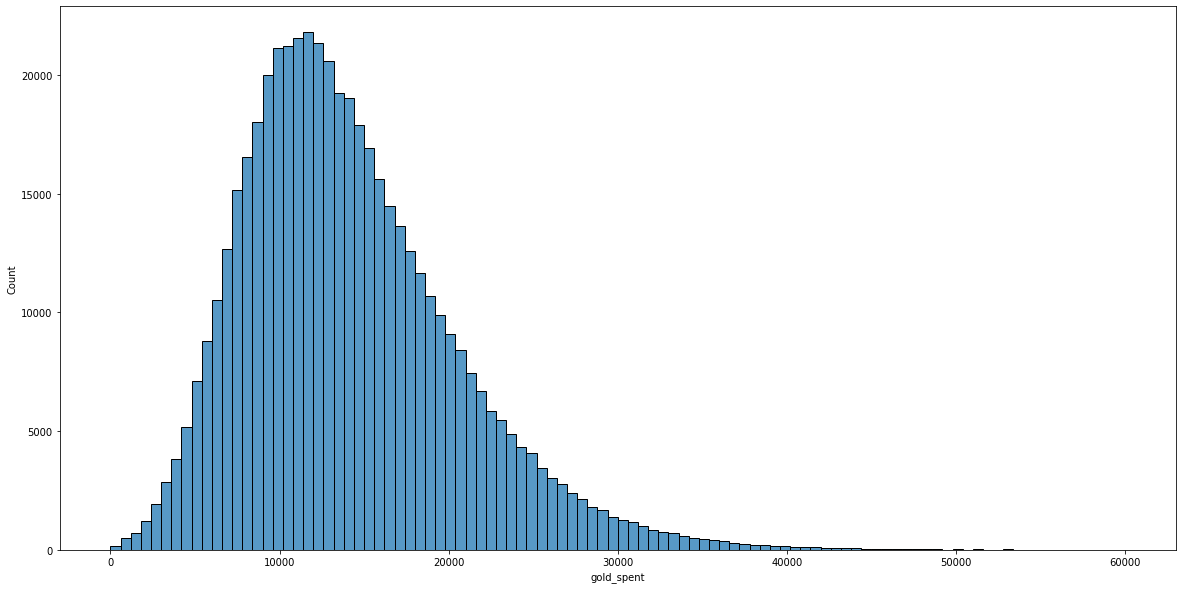

In [51]:
fig = plt.figure(figsize = (20, 10))
sns.histplot(x = "gold_spent", data = merged, bins = 100, binrange = (0, 60000))

<h4>Количество игроков c разным статусом подключения</h4>
<p><i>0 - не покидал матч, 1 - отключался, 2 - отключился на слишком длительное время и покинул игру, 3 - покинул игру, 4 - афк</i></p>

<AxesSubplot:xlabel='leaver_status', ylabel='count'>

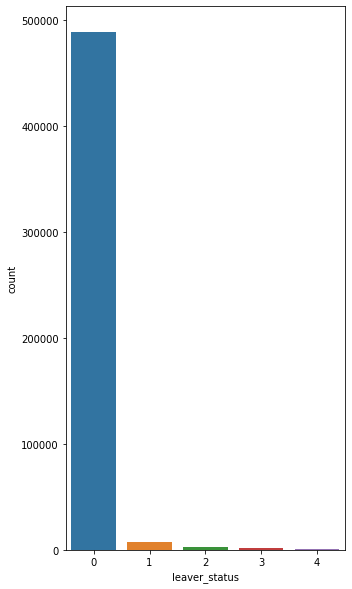

In [52]:
fig = plt.figure(figsize = (5, 10))
sns.countplot(x = "leaver_status", data = merged)

<h4>Частота выбора героев</h4>

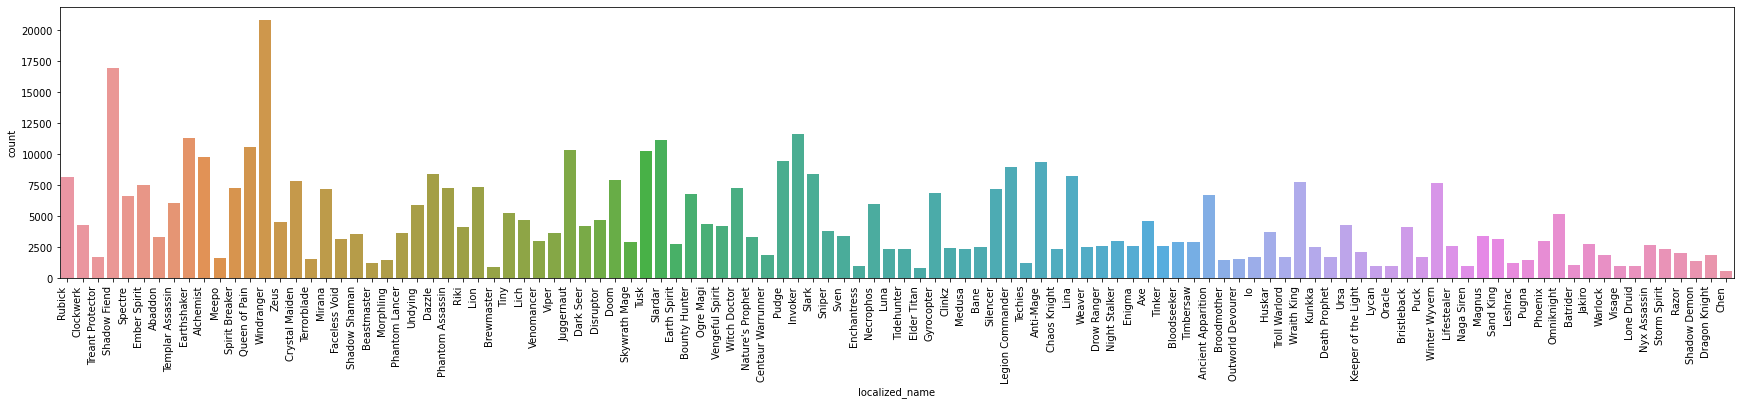

In [53]:
fig = plt.figure(figsize = (30, 5))
gr = sns.countplot(x = "localized_name", data = merged)
gr.set_xticklabels(gr.get_xticklabels(), rotation = 90, ha = "right")
plt.show()

<h4>Распределение золота в минуту</h4>

<AxesSubplot:xlabel='gold_per_min', ylabel='Count'>

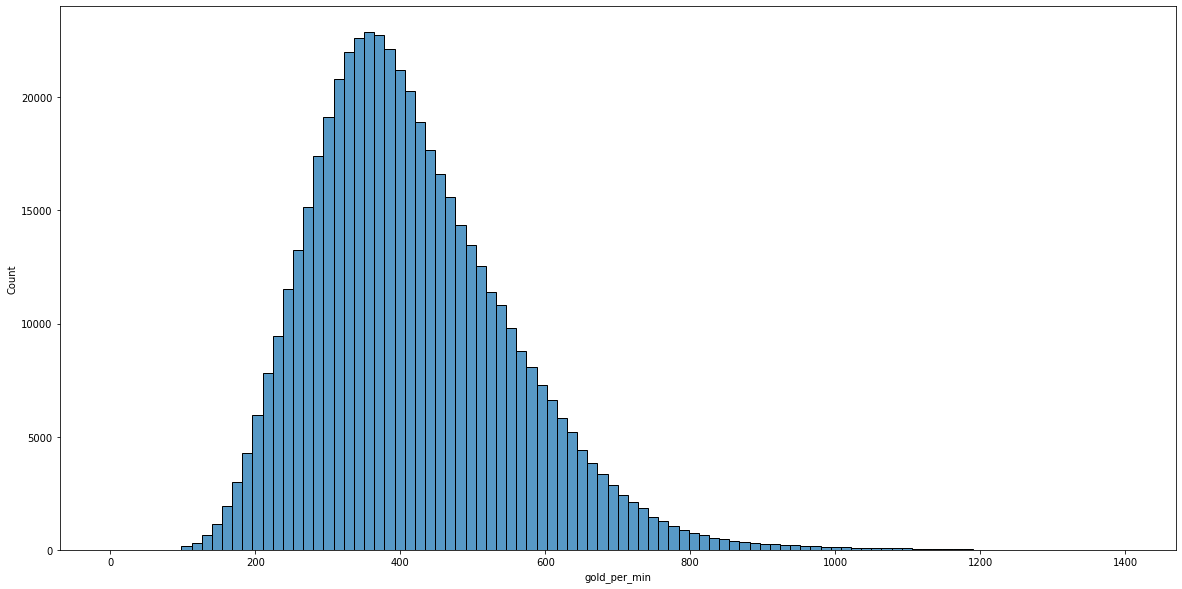

In [54]:
fig = plt.figure(figsize = (20,10))
sns.histplot(x = "gold_per_min", data = merged, bins = 100, binrange = (0, 1400))

<h4>График распределения игроков по командам и слотам в команде</h4>

<AxesSubplot:xlabel='player_slot', ylabel='count'>

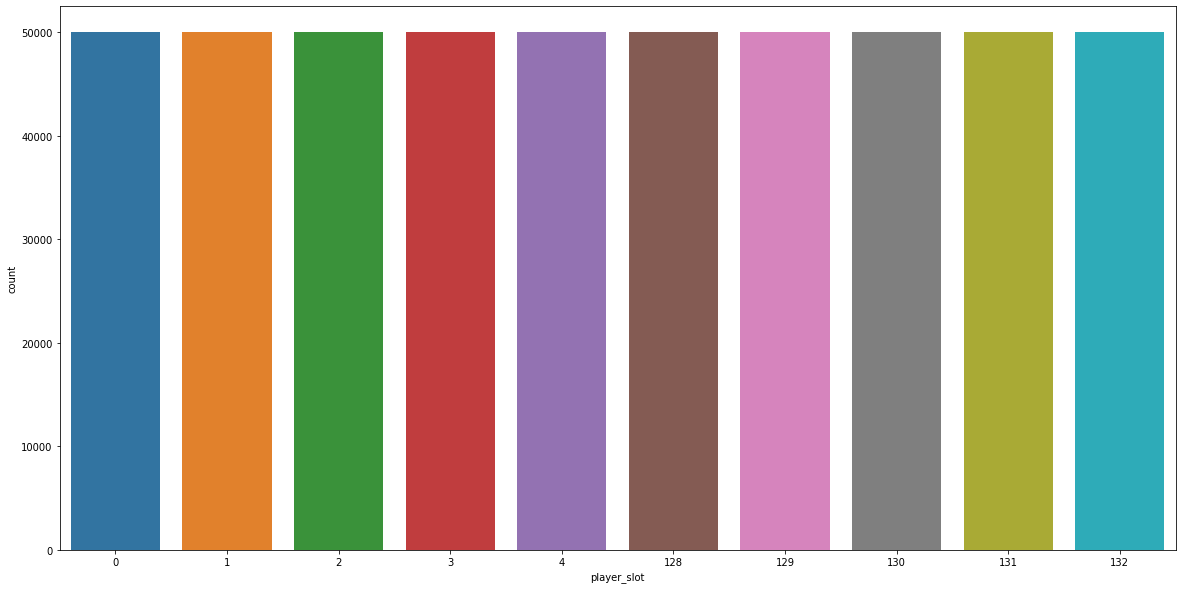

In [55]:
fig = plt.figure(figsize = (20,10))
sns.countplot(x = "player_slot", data = merged)

<h4>Распределение времени стана</h4>

<AxesSubplot:xlabel='stuns', ylabel='Count'>

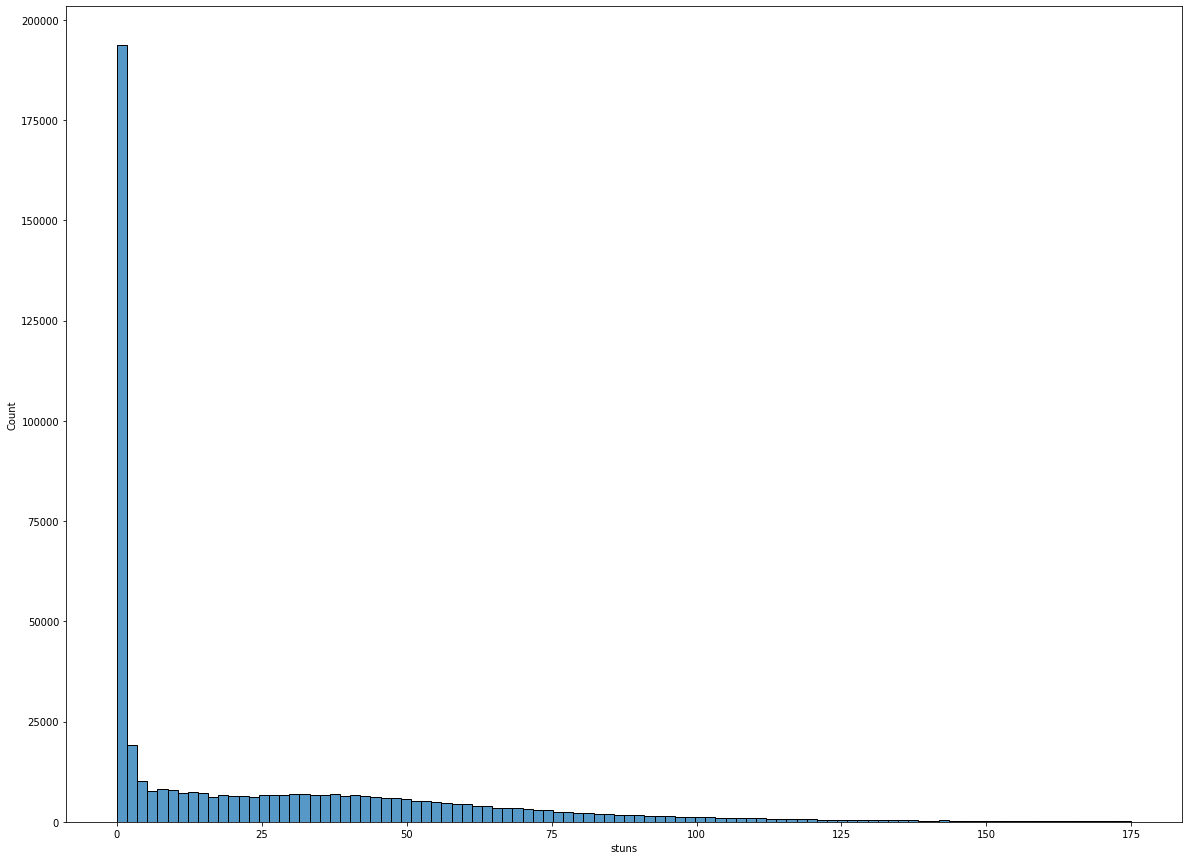

In [56]:
# Заменим для атрибута stuns все вхождения None на 0
# Это возможно, так как отсутствие стана равносильно длительности стана в 0 секунд
merged["stuns"].replace({"None" : "0"}, inplace = True)
# Приведем атрибут к числовому типу данных, чтобы построить график
merged.stuns = merged.stuns.astype(float)

fig = plt.figure(figsize = (20,15))
sns.histplot(x = "stuns", data = merged, bins = 100, binrange = (0, 175))

<h2>Группировка</h2>

<h4>Средний и максимальный GPM по героям</h4>

In [57]:
group_h_gpm = merged.groupby("localized_name")
for localized_name, g in group_h_gpm:
    print("| Hero: {0:30}| mean gpm: {1:5.5f} {2:10}| top gpm: {3:5.2f}"
          .format(localized_name, g["gold_per_min"].mean(), "", g["gold_per_min"].max()))

| Hero: Abaddon                       | mean gpm: 363.05529           | top gpm: 790.00
| Hero: Alchemist                     | mean gpm: 709.54545           | top gpm: 1601.00
| Hero: Ancient Apparition            | mean gpm: 313.14705           | top gpm: 1064.00
| Hero: Anti-Mage                     | mean gpm: 554.19274           | top gpm: 1164.00
| Hero: Axe                           | mean gpm: 400.10911           | top gpm: 831.00
| Hero: Bane                          | mean gpm: 295.29338           | top gpm: 578.00
| Hero: Batrider                      | mean gpm: 362.85674           | top gpm: 731.00
| Hero: Beastmaster                   | mean gpm: 384.13481           | top gpm: 689.00
| Hero: Bloodseeker                   | mean gpm: 447.64175           | top gpm: 1019.00
| Hero: Bounty Hunter                 | mean gpm: 412.04961           | top gpm: 914.00
| Hero: Brewmaster                    | mean gpm: 398.55961           | top gpm: 734.00
| Hero: Bristleback         

<h4>Время стана в зависимости от героя</h4>
<p><i>Эти данные показывают, на каких героях, например, отсутствуют станящие способности, и используются предметы для стана</i></p>

In [58]:
group_h_stuns = merged.groupby("localized_name")
for localized_name, g in group_h_stuns:
    print("| Hero: {0:30}| mean stun time: {1:20} {2:10}| top stun time: {3:5.2f}"
          .format(localized_name, str(g["stuns"].mean()), "", g["stuns"].max()))

| Hero: Abaddon                       | mean stun time: 1.3031869575626585             | top stun time: 50.40
| Hero: Alchemist                     | mean stun time: 39.06189685701924              | top stun time: 272.16
| Hero: Ancient Apparition            | mean stun time: 13.696643340633795             | top stun time: 110.38
| Hero: Anti-Mage                     | mean stun time: 4.774384330776512              | top stun time: 78.75
| Hero: Axe                           | mean stun time: 0.1719751524956314             | top stun time: 32.66
| Hero: Bane                          | mean stun time: 96.94718406188797              | top stun time: 302.66
| Hero: Batrider                      | mean stun time: 40.85690123529412              | top stun time: 139.04
| Hero: Beastmaster                   | mean stun time: 31.312788620142744             | top stun time: 83.50
| Hero: Bloodseeker                   | mean stun time: 1.2394499205199763             | top stun time: 47.76
| Hero

<h4>Средний и максимальный урон по строениям в зависимости от героя</h4>

In [59]:
group_h_td = merged.groupby("localized_name")
for localized_name, g in group_h_td:
    print("| Hero: {0:30}| mean tower damage: {1:20} {2:10}| top tower damage: {3:5.2f}"
          .format(localized_name, str(g["tower_damage"].mean()), "", g["tower_damage"].max()))

| Hero: Abaddon                       | mean tower damage: 1009.6069486404834             | top tower damage: 9151.00
| Hero: Alchemist                     | mean tower damage: 2585.1727578132954             | top tower damage: 13363.00
| Hero: Ancient Apparition            | mean tower damage: 298.4532800236932              | top tower damage: 4139.00
| Hero: Anti-Mage                     | mean tower damage: 3081.401766709238              | top tower damage: 14599.00
| Hero: Axe                           | mean tower damage: 453.6166050858509              | top tower damage: 4397.00
| Hero: Bane                          | mean tower damage: 381.01880141010577             | top tower damage: 5129.00
| Hero: Batrider                      | mean tower damage: 268.39373814041744             | top tower damage: 2246.00
| Hero: Beastmaster                   | mean tower damage: 1491.4956383822364             | top tower damage: 8149.00
| Hero: Bloodseeker                   | mean tower dam

<h4>График размаха по группам для урона по строениям</h4>

<AxesSubplot:xlabel='tower_damage', ylabel='localized_name'>

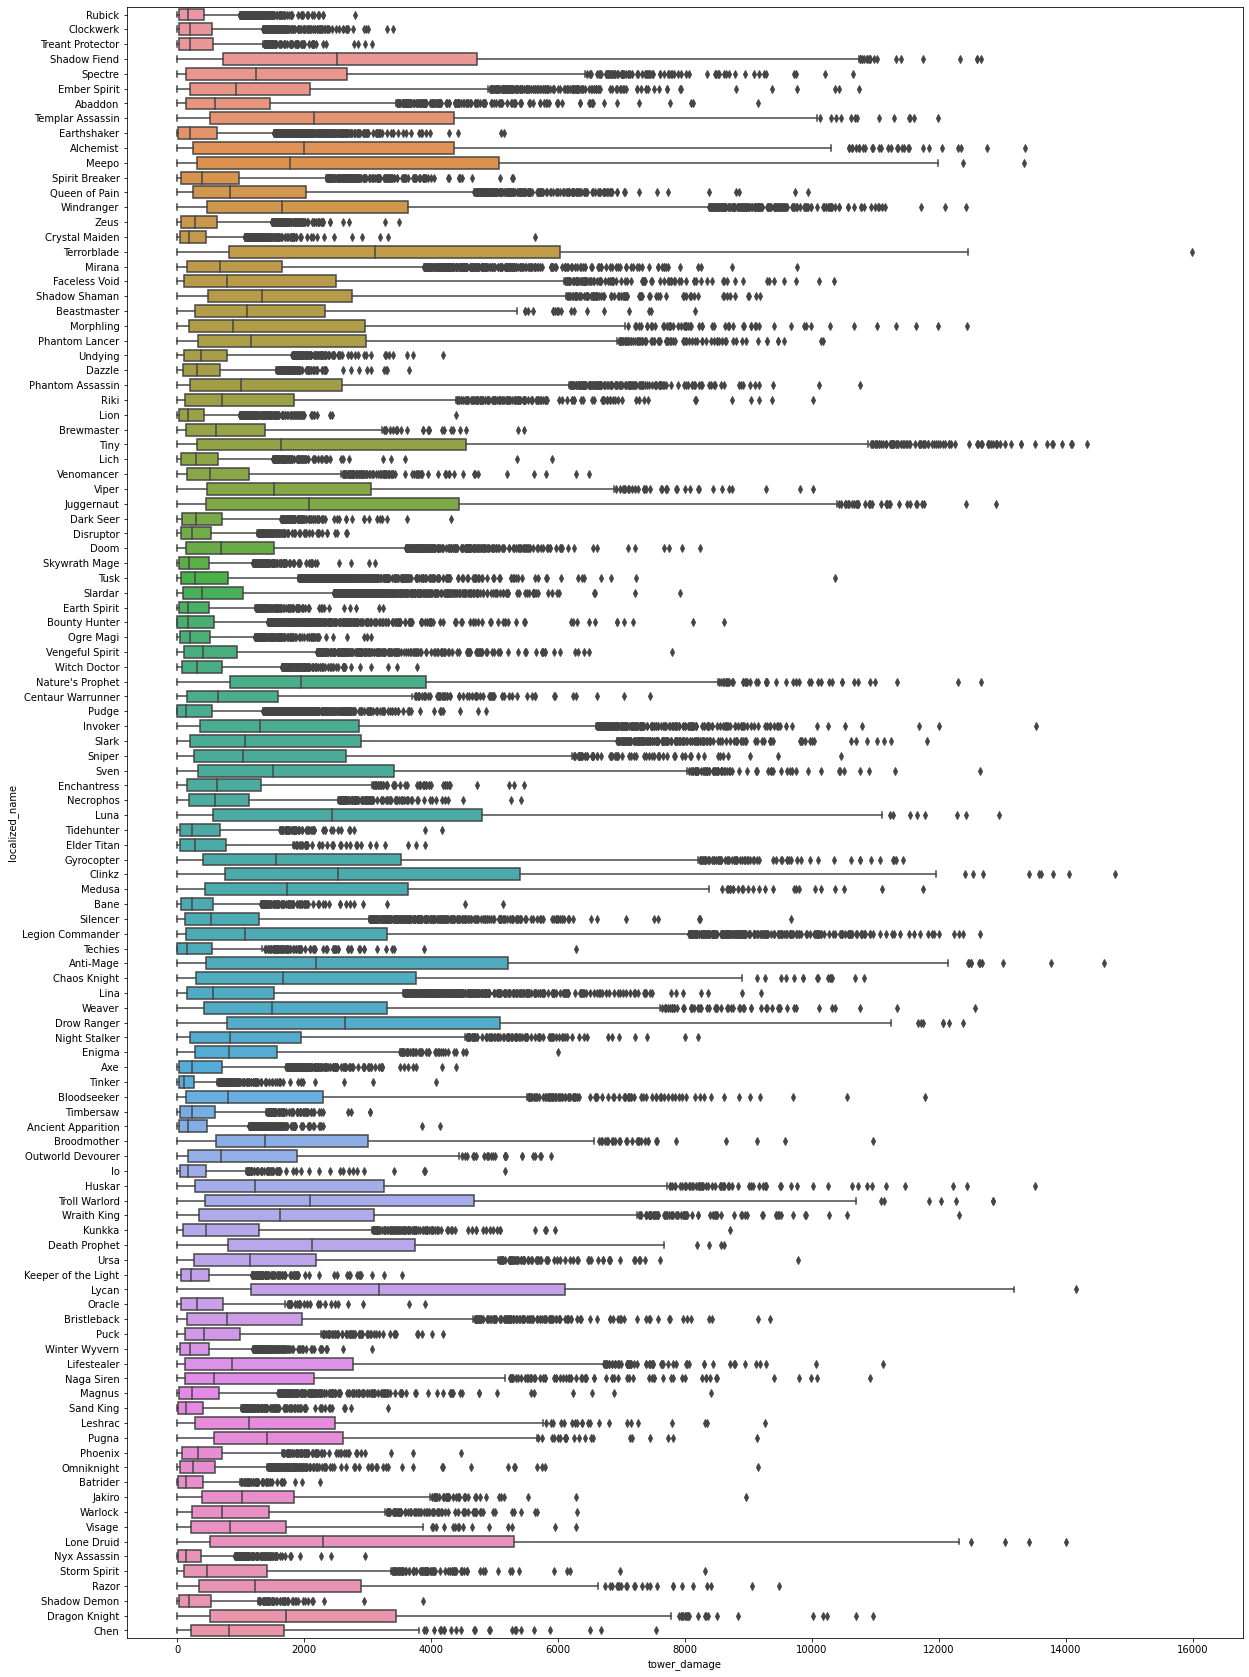

In [60]:
fig = plt.figure(figsize = (20,30))
sns.boxplot(x = "tower_damage", y = "localized_name", data = merged)

<AxesSubplot:xlabel='tower_damage', ylabel='player_slot'>

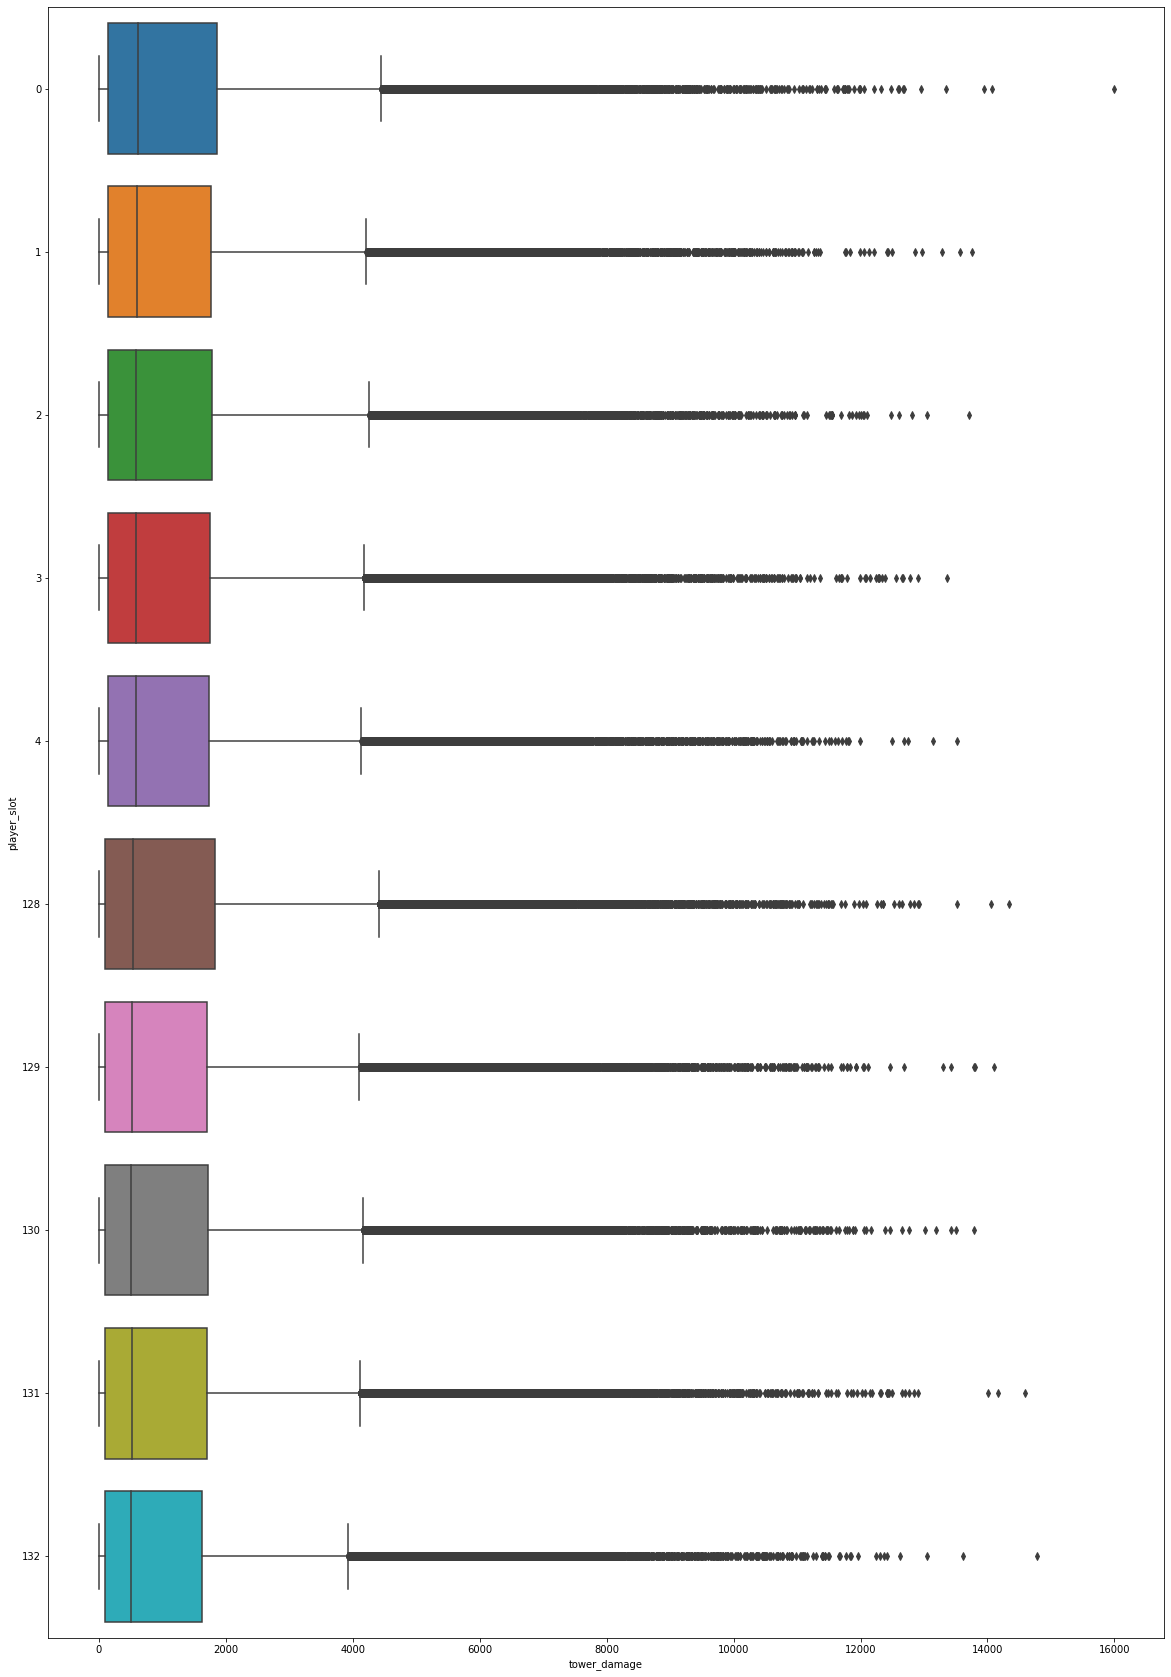

In [61]:
fig = plt.figure(figsize = (20,30))
gr_s_td = merged.copy()
gr_s_td.player_slot = gr_s_td.player_slot.astype(str)
sns.boxplot(x = "tower_damage", y = "player_slot", data = gr_s_td)

<AxesSubplot:xlabel='tower_damage', ylabel='leaver_status'>

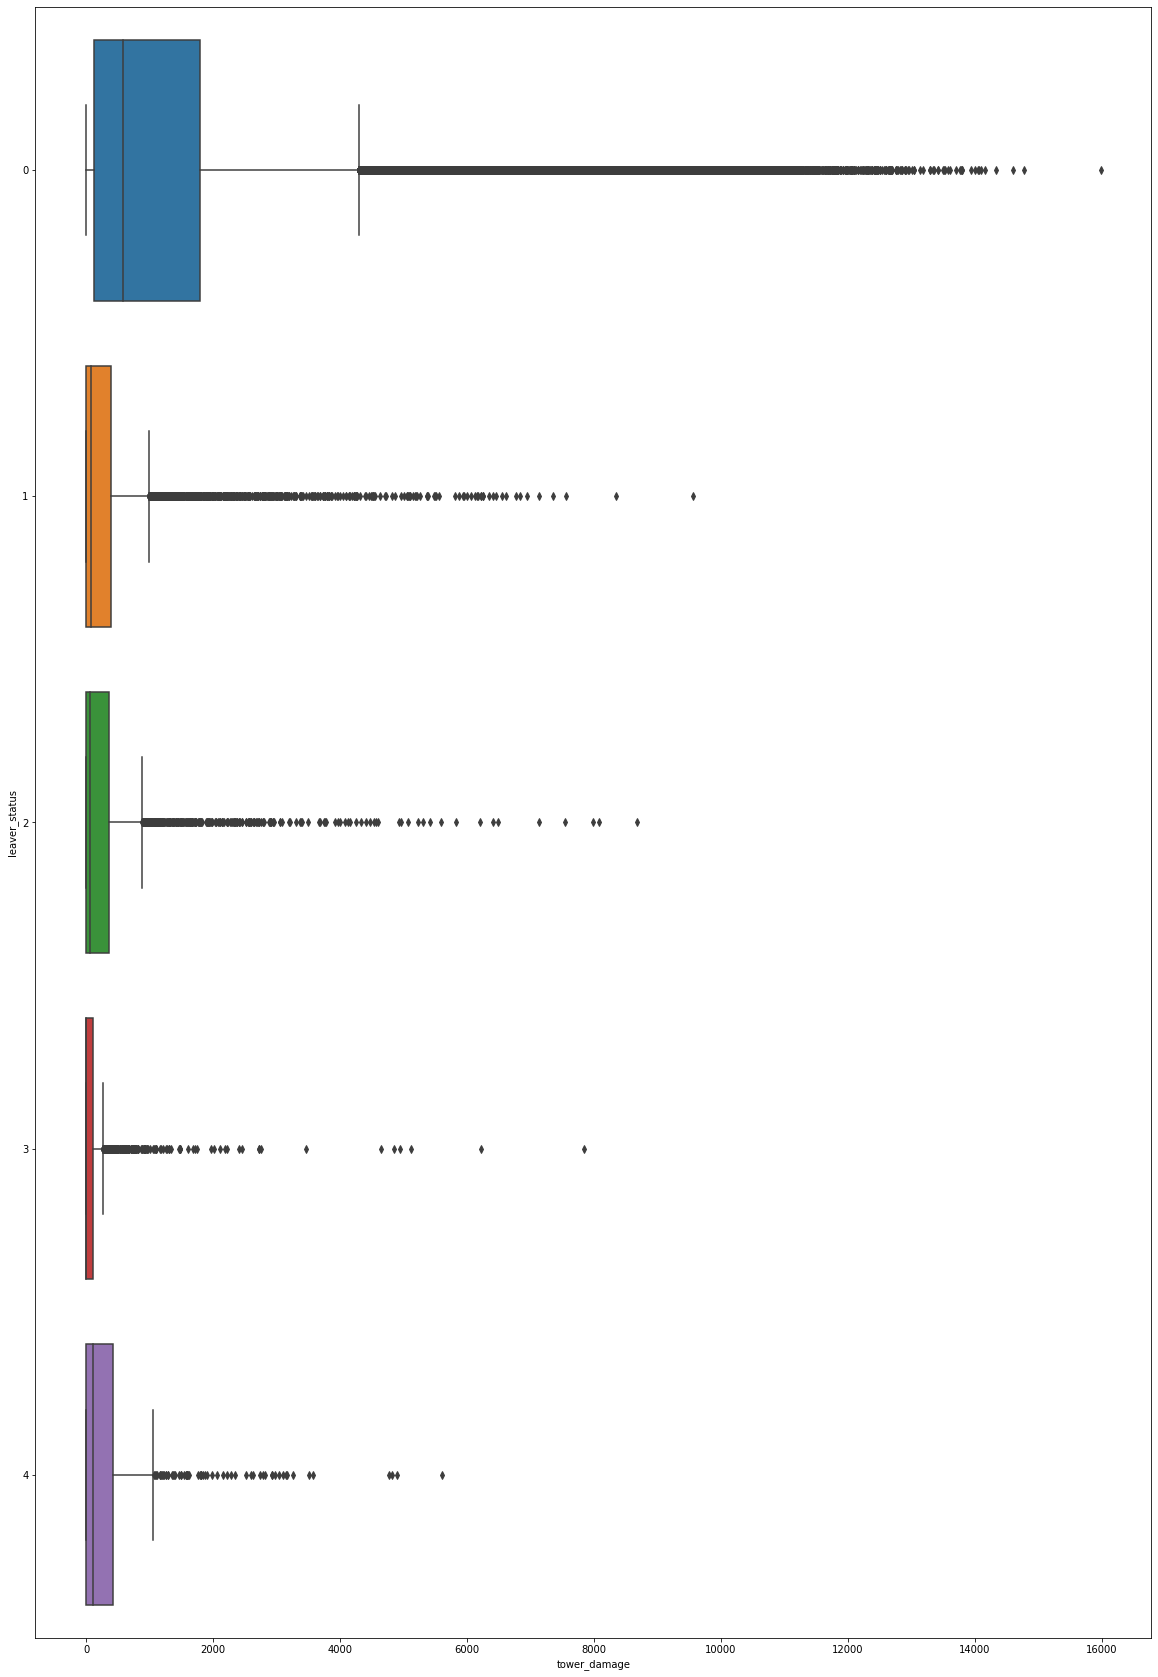

In [62]:
fig = plt.figure(figsize = (20,30))
gr_l_td = merged.copy()
gr_l_td.leaver_status = gr_l_td.leaver_status.astype(str)
sns.boxplot(x = "tower_damage", y = "leaver_status", data = gr_l_td)

<h2>Визуализация зависимостей</h2>

<h4>График соотношения количества убийств в зависимости от героя</h4>

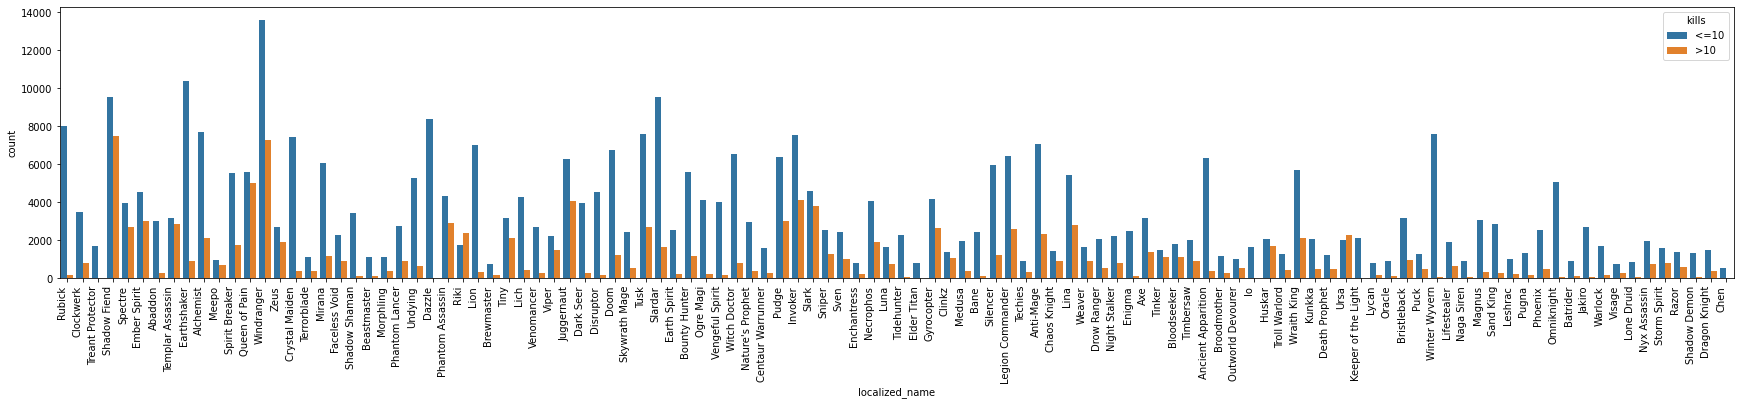

In [63]:
fig = plt.figure(figsize = (30, 5))
# Сделаем копию датафрейма для этой визуализации
# Таким образом мы можем разделить все значения убийств на нужные нам интервалы <=10 и >10
gr_kills = merged.copy()
gr_kills.kills = gr_kills.kills.astype(int)
gr_kills.loc[gr_kills["kills"] <= 10, "kills"] = 0
gr_kills.loc[gr_kills["kills"] > 10, "kills"] = 1
gr = sns.countplot(x = "localized_name", hue = "kills", data = gr_kills)

gr.set_xticklabels(gr.get_xticklabels(), rotation = 90, ha = "right")
legend_labels, _= gr.get_legend_handles_labels()
gr.legend(legend_labels, ["<=10", ">10"], bbox_to_anchor = (1,1), title = "kills")
plt.show()

<h4>График соотношения количества смертей в зависимости от количества убийств</h4>

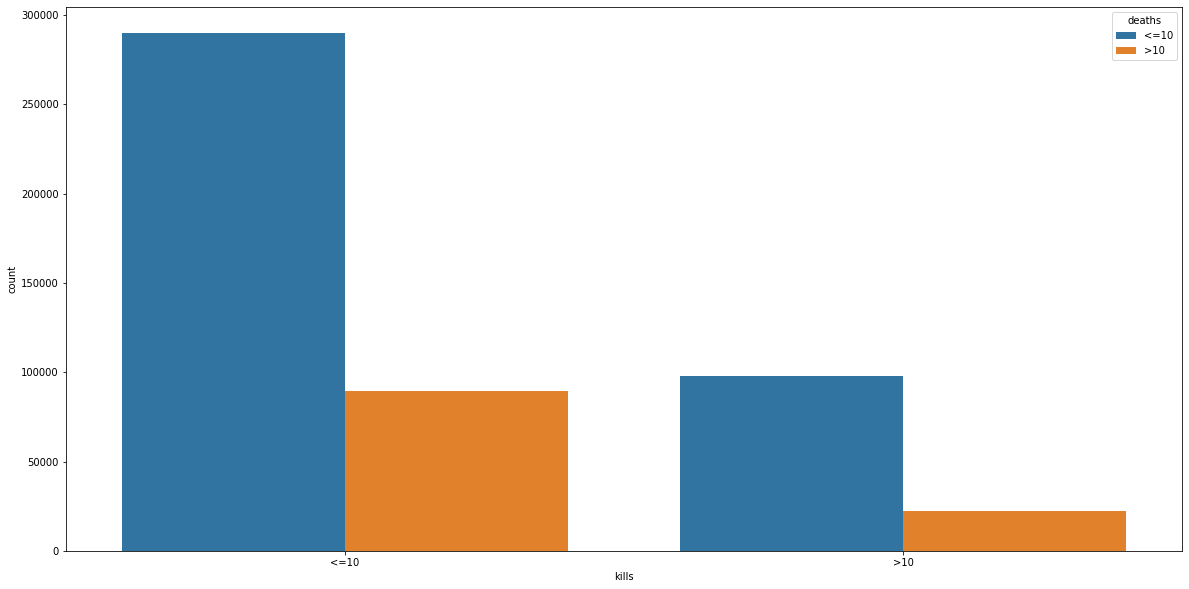

In [64]:
fig = plt.figure(figsize = (20, 10))

# Аналогично прошлому графику но с двумя атрибутами
gr_kd = merged.copy()
gr_kd.deaths = gr_kd.deaths.astype(int)
gr_kd.loc[gr_kd["deaths"] <= 10, "deaths"] = 0
gr_kd.loc[gr_kd["deaths"] > 10, "deaths"] = 1
gr_kd.kills = gr_kd.kills.astype(int)
gr_kd.loc[gr_kd["kills"] <= 10, "kills"] = 0
gr_kd.loc[gr_kd["kills"] > 10, "kills"] = 1
gr_kd.kills = gr_kd.kills.astype(str)
gr_kd.loc[gr_kd["kills"] == "0", "kills"] = "<=10"
gr_kd.loc[gr_kd["kills"] == "1", "kills"] = ">10"
gr = sns.countplot(x = "kills", hue = "deaths", data = gr_kd)
legend_labels, _= gr.get_legend_handles_labels()
gr.legend(legend_labels, ["<=10", ">10"], bbox_to_anchor = (1,1), title = "deaths")
plt.show()

<h4>График соотношения статусов отключения от игры относительно героев</h4>

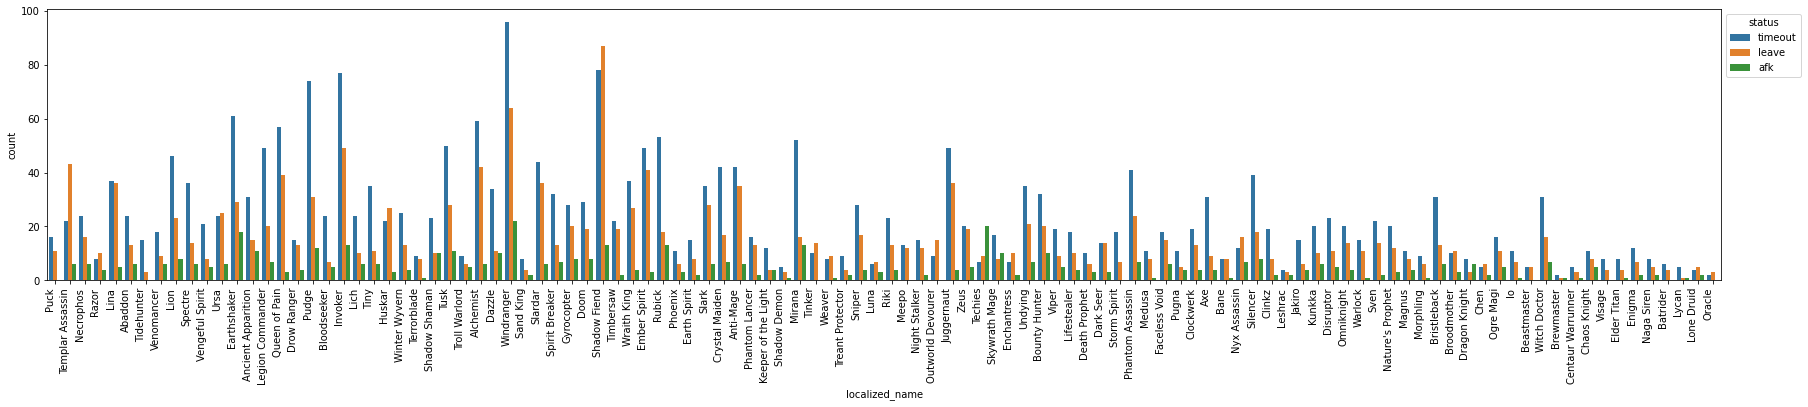

In [65]:
fig = plt.figure(figsize = (30, 5))

gr_h_leaver = merged.copy()
gr = sns.countplot(x = "localized_name", hue = "leaver_status", data = gr_h_leaver.loc[~gr_h_leaver["leaver_status"].isin([0,1])])
legend_labels, _= gr.get_legend_handles_labels()
gr.legend(legend_labels, ["timeout", "leave", "afk"], bbox_to_anchor = (1,1), title = "status")
gr.set_xticklabels(gr.get_xticklabels(), rotation = 90, ha = "right")
plt.show()

<h2>Пропуски данных и аномальные выбросы</h2>

<h4>Выбросы в потраченном золоте (gold_spent)</h4>

In [66]:
merged["gold_spent"].describe()

count    500000.000000
mean      14110.043850
std        6401.868898
min           0.000000
25%        9590.000000
50%       13110.000000
75%       17635.000000
max      200000.000000
Name: gold_spent, dtype: float64

In [67]:
#Обнаружена аномальная игра, в которой два игрока потратили аномально большое (по сравнению в другими игроками этого матча) количество денег
merged.gold_spent = merged.gold_spent.astype(int)
merged[merged["gold_spent"] > 89417][["match_id", "gold_spent"]]

,match_id,gold_spent
99468,9946,89660
99469,9946,98950
403448,40344,162645
403449,40344,200000


In [68]:
merged[merged["match_id"] == 40344][["localized_name", "gold_spent", "gold_sell", "gold_other", "gold_per_min", "level", "hero_damage", "leaver_status"]]

,localized_name,gold_spent,gold_sell,gold_other,gold_per_min,level,hero_damage,leaver_status
403440,Earthshaker,6460,649.0,100.0,275,13,4255,2
403441,Juggernaut,8855,1307.0,297.0,274,11,1494,2
403442,Io,7075,948.0,55.0,262,11,6270,2
403443,Tusk,17495,132.0,136.0,526,18,13844,0
403444,Dragon Knight,24495,3475.0,175.0,621,21,13901,0
403445,Templar Assassin,20285,842.0,357.0,606,23,22856,0
403446,Zeus,8565,387.0,493.0,273,16,12339,0
403447,Techies,6400,762.0,257.0,186,8,3853,0
403448,Broodmother,162645,159320.0,119.0,207,11,3062,0
403449,Riki,200000,197237.0,154.0,302,14,6562,0


In [69]:
#Решение - далее в gold_sell

<h4>Выбросы в показателях контроля (stuns)</h4>

In [70]:
#Обнаружены отрицателные значения контроля
merged["stuns"].describe()

count    500000.000000
mean         26.241222
std          33.988159
min          -3.364900
25%           0.000000
50%          11.105200
75%          43.789125
max         554.836000
Name: stuns, dtype: float64

In [71]:
merged[merged["stuns"] < 0][["match_id", "localized_name", "stuns"]]

,match_id,localized_name,stuns
1601,160,Shadow Fiend,-0.000020
2929,292,Anti-Mage,-0.000073
3769,376,Doom,-0.755454
3879,387,Bloodseeker,-0.000010
5702,570,Templar Assassin,-0.000010
...,...,...,...
496309,49630,Anti-Mage,-0.000024
496323,49632,Anti-Mage,-0.000049
496788,49678,Legion Commander,-0.000024
497009,49700,Shadow Fiend,-0.000020


In [72]:
#Решение - заменить все отрицательные значения на минимально возможное 0
merged[merged["stuns"] < 0] = 0
merged["stuns"].describe()

count    500000.000000
mean         26.241514
std          33.987928
min           0.000000
25%           0.000000
50%          11.105200
75%          43.789125
max         554.836000
Name: stuns, dtype: float64

In [73]:
merged[merged["stuns"] < 0][["match_id", "localized_name", "stuns"]]

,match_id,localized_name,stuns


<h4>Выбросы в полученном от продаже предметов золоте (gold_sell)</h4>

In [74]:
merged["gold_sell"].describe()

count    397516.000000
mean        657.852288
std        1016.240927
min           0.000000
25%         137.000000
50%         350.000000
75%         817.000000
max      197237.000000
Name: gold_sell, dtype: float64

In [75]:
#Та же самая аномальная игра, те же самые два игрока продали предметов на аномальную сумму
merged[merged["gold_sell"] > 30000][["match_id", "gold_sell"]]

,match_id,gold_sell
104218,10421,59437.0
113010,11301,31454.0
153451,15345,36444.0
332079,33207,32249.0
335517,33551,71658.0
355453,35545,34087.0
403448,40344,159320.0
403449,40344,197237.0
412630,41263,64414.0
433687,43368,47672.0


In [76]:
#Решение - убрать аномальную игру из выборки
merged = merged[merged["match_id"] != 40344]
merged[attrib]
#10 строк были удалены из выборки

,match_id,player_slot,localized_name,kills,deaths,assists,item_name_1,item_name_2,item_name_3,item_name_4,...,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers,gold_other,xp_per_min,xp_hero,xp_creep,xp_roshan,xp_other,leaver_status
0,0,0,Rubick,9,3,18,arcane_boots,ghost,bracer,ring_of_health,...,1087.0,400.0,NaN,50.0,362,8840.0,5440.0,NaN,83.0,0
1,0,1,Clockwerk,13,3,18,tpscroll,power_treads,shivas_guard,force_staff,...,4317.0,937.0,NaN,395.0,659,14331.0,8440.0,2683.0,671.0,0
2,0,2,Treant Protector,0,4,15,travel_boots,point_booster,energy_booster,ultimate_scepter,...,3697.0,400.0,NaN,259.0,385,6692.0,8112.0,NaN,453.0,0
3,0,3,Shadow Fiend,8,4,19,power_treads,manta,sange_and_yasha,helm_of_the_dominator,...,10432.0,400.0,NaN,100.0,605,8583.0,14230.0,894.0,293.0,0
4,0,4,Spectre,20,3,17,heart,urn_of_shadows,manta,NaN,...,9220.0,400.0,NaN,NaN,762,15814.0,14325.0,NaN,62.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,49999,128,Tusk,16,9,16,silver_edge,bottle,NaN,phase_boots,...,2940.0,400.0,NaN,528.0,626,21496.0,6025.0,596.0,1007.0,0
499996,49999,129,Mirana,12,6,11,monkey_king_bar,power_treads,maelstrom,gem,...,4346.0,857.0,175.0,329.0,607,16360.0,9653.0,1490.0,740.0,0
499997,49999,130,Keeper of the Light,5,3,11,mekansm,travel_boots,invis_sword,ultimate_scepter,...,3833.0,400.0,175.0,303.0,404,8205.0,10012.0,NaN,600.0,0
499998,49999,131,Alchemist,8,6,17,silver_edge,sange_and_yasha,assault,travel_boots,...,12927.0,400.0,175.0,8302.0,703,11773.0,20005.0,596.0,327.0,0


In [77]:
#Проверяем
merged["gold_sell"].describe()

count    397506.000000
mean        656.950464
std         933.918931
min           0.000000
25%         137.000000
50%         350.000000
75%         817.000000
max       85154.000000
Name: gold_sell, dtype: float64

In [78]:
merged["gold_spent"].describe()

count    499990.000000
mean      14093.639443
std        6404.467125
min           0.000000
25%        9580.000000
50%       13100.000000
75%       17625.000000
max       98950.000000
Name: gold_spent, dtype: float64

<h4>Пропуски</h4>

localized_name - 37 пропусков </br>
item_name - 4543 пропуска </br>
stuns - 152349 пропусков </br>
gold_death - 6299 пропусков </br>
gold_buyback - 352859 пропусков </br>
gold_abandon - 479366 пропусков </br>
gold_sell - 102593 пропуска </br>
gold_destroying_structure - 19675 пропусков </br>
gold_killing_heros - 1565 пропусков </br>
gold_killing_creeps - 294 пропуска </br>
gold_killing_roshan - 240264 пропуска </br>
gold_killing_couriers - 403021 пропуска </br>
gold_other - 94897 пропуска </br>
xp_hero - 1883 пропуска </br>
xp_creep - 67 пропусков </br>
xp_roshan - 320438 пропусков </br>
xp_other - 21036 пропусков </br>
</br>
Все пропуски связаны со значениями NaN </br>
Везде, кроме localized_name и item_name на месте пропусков должен быть 0 </br>
В localized_name NaN подходит как значение, так как это означает, что герой не был выбран вообще </br>

In [96]:
#Заменим все NaN везде, кроме localized_name и item_name, на 0
merged["stuns"].fillna(0, inplace = True)
merged["stuns"].describe()

c:\python38\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


count    499990.000000
mean         26.241791
std          33.988096
min           0.000000
25%           0.000000
50%          11.105300
75%          43.789200
max         554.836000
Name: stuns, dtype: float64

In [80]:
#Заменим все NaN везде, кроме localized_name и item_name, на 0
merged["gold_death"].fillna(0, inplace = True)
merged["gold_death"].describe()

count    499990.000000
mean      -2652.764629
std        1516.058265
min      -23757.000000
25%       -3562.000000
50%       -2485.000000
75%       -1527.000000
max           0.000000
Name: gold_death, dtype: float64

In [81]:
#Заменим все NaN везде, кроме localized_name и item_name, на 0
merged["gold_buyback"].fillna(0, inplace = True)
merged["gold_buyback"].describe()

count    499990.000000
mean       -336.993024
std         665.173054
min      -22602.000000
25%        -405.000000
50%           0.000000
75%           0.000000
max           0.000000
Name: gold_buyback, dtype: float64

In [82]:
#Заменим все NaN везде, кроме localized_name и item_name, на 0
merged["gold_abandon"].fillna(0, inplace = True)
merged["gold_abandon"].describe()

count    499990.000000
mean         45.994806
std         344.016979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       18339.000000
Name: gold_abandon, dtype: float64

In [83]:
#Заменим все NaN везде, кроме localized_name и item_name, на 0
merged["gold_sell"].fillna(0, inplace = True)
merged["gold_sell"].describe()

count    499990.000000
mean        522.293948
std         873.931940
min           0.000000
25%          31.000000
50%         235.000000
75%         645.000000
max       85154.000000
Name: gold_sell, dtype: float64

In [84]:
#Заменим все NaN везде, кроме localized_name и item_name, на 0
merged["gold_destroying_structure"].fillna(0, inplace = True)
merged["gold_destroying_structure"].describe()

count    499990.000000
mean       2349.502634
std        1738.866597
min           0.000000
25%         580.000000
50%        2447.000000
75%        3960.000000
max        7610.000000
Name: gold_destroying_structure, dtype: float64

In [85]:
#Заменим все NaN везде, кроме localized_name и item_name, на 0
merged["gold_killing_heros"].fillna(0, inplace = True)
merged["gold_killing_heros"].describe()

count    499990.000000
mean       4931.425257
std        2686.927508
min           0.000000
25%        3014.000000
50%        4535.000000
75%        6409.000000
max       37658.000000
Name: gold_killing_heros, dtype: float64

In [86]:
#Заменим все NaN везде, кроме localized_name и item_name, на 0
merged["gold_killing_creeps"].fillna(0, inplace = True)
merged["gold_killing_creeps"].describe()

count    499990.000000
mean       5094.558611
std        3931.555202
min           0.000000
25%        2097.000000
50%        4167.000000
75%        7067.000000
max      112058.000000
Name: gold_killing_creeps, dtype: float64

In [87]:
#Заменим все NaN везде, кроме localized_name и item_name, на 0
merged["gold_killing_roshan"].fillna(0, inplace = True)
merged["gold_killing_roshan"].describe()

count    499990.000000
mean        195.456563
std         255.222647
min           0.000000
25%           0.000000
50%         200.000000
75%         381.000000
max        4227.000000
Name: gold_killing_roshan, dtype: float64

In [88]:
#Заменим все NaN везде, кроме localized_name и item_name, на 0
merged["gold_killing_couriers"].fillna(0, inplace = True)
merged["gold_killing_couriers"].describe()

count    499990.000000
mean         38.174183
std          85.498933
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1725.000000
Name: gold_killing_couriers, dtype: float64

In [89]:
#Заменим все NaN везде, кроме localized_name и item_name, на 0
merged["gold_other"].fillna(0, inplace = True)
merged["gold_other"].describe()

count    499990.000000
mean        399.625619
std        1251.773305
min        -100.000000
25%          59.000000
50%         166.000000
75%         336.000000
max       30986.000000
Name: gold_other, dtype: float64

In [90]:
#Заменим все NaN везде, кроме localized_name и item_name, на 0
merged["xp_hero"].fillna(0, inplace = True)
merged["xp_hero"].describe()

count    499990.000000
mean       8724.289778
std        4884.470036
min           0.000000
25%        4987.000000
50%        8093.000000
75%       11918.000000
max       29055.000000
Name: xp_hero, dtype: float64

In [91]:
#Заменим все NaN везде, кроме localized_name и item_name, на 0
merged["xp_creep"].fillna(0, inplace = True)
merged["xp_creep"].describe()

count    499990.000000
mean       9460.144437
std        4430.175844
min           0.000000
25%        6120.000000
50%        8646.000000
75%       12070.000000
max       31642.000000
Name: xp_creep, dtype: float64

In [92]:
#Заменим все NaN везде, кроме localized_name и item_name, на 0
merged["xp_roshan"].fillna(0, inplace = True)
merged["xp_roshan"].describe()

count    499990.000000
mean        260.960225
std         476.289317
min           0.000000
25%           0.000000
50%           0.000000
75%         447.000000
max        8050.000000
Name: xp_roshan, dtype: float64

In [93]:
#Заменим все NaN везде, кроме localized_name и item_name, на 0
merged["xp_other"].fillna(0, inplace = True)
merged["xp_other"].describe()

count    499990.000000
mean        429.250169
std        1111.471289
min           0.000000
25%         112.000000
50%         280.000000
75%         533.000000
max       25557.000000
Name: xp_other, dtype: float64

In [95]:
#Данные без пропусков и выбросов
merged[attrib]

,match_id,player_slot,localized_name,kills,deaths,assists,item_name_1,item_name_2,item_name_3,item_name_4,...,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers,gold_other,xp_per_min,xp_hero,xp_creep,xp_roshan,xp_other,leaver_status
0,0,0,Rubick,9,3,18,arcane_boots,ghost,bracer,ring_of_health,...,1087.0,400.0,0.0,50.0,362,8840.0,5440.0,0.0,83.0,0
1,0,1,Clockwerk,13,3,18,tpscroll,power_treads,shivas_guard,force_staff,...,4317.0,937.0,0.0,395.0,659,14331.0,8440.0,2683.0,671.0,0
2,0,2,Treant Protector,0,4,15,travel_boots,point_booster,energy_booster,ultimate_scepter,...,3697.0,400.0,0.0,259.0,385,6692.0,8112.0,0.0,453.0,0
3,0,3,Shadow Fiend,8,4,19,power_treads,manta,sange_and_yasha,helm_of_the_dominator,...,10432.0,400.0,0.0,100.0,605,8583.0,14230.0,894.0,293.0,0
4,0,4,Spectre,20,3,17,heart,urn_of_shadows,manta,NaN,...,9220.0,400.0,0.0,0.0,762,15814.0,14325.0,0.0,62.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,49999,128,Tusk,16,9,16,silver_edge,bottle,NaN,phase_boots,...,2940.0,400.0,0.0,528.0,626,21496.0,6025.0,596.0,1007.0,0
499996,49999,129,Mirana,12,6,11,monkey_king_bar,power_treads,maelstrom,gem,...,4346.0,857.0,175.0,329.0,607,16360.0,9653.0,1490.0,740.0,0
499997,49999,130,Keeper of the Light,5,3,11,mekansm,travel_boots,invis_sword,ultimate_scepter,...,3833.0,400.0,175.0,303.0,404,8205.0,10012.0,0.0,600.0,0
499998,49999,131,Alchemist,8,6,17,silver_edge,sange_and_yasha,assault,travel_boots,...,12927.0,400.0,175.0,8302.0,703,11773.0,20005.0,596.0,327.0,0
